# ART Example 1: Maximize Limonene Production

In this notebook we demonstrate the usage of the Automatic Recommendation Tool (ART) to recommend strain designs for improving limonene production.

In this case we have proteomics data which will be used to determine maximum production of limonene in terms of total protein concentrations. Then target protein concentrations will be reported back to the user.


Tested using **ART Prod** kernel on [skynet.ese.lbl.gov](https://skynet.ese.lbl.gov)

## Inputs and Outputs

#### Required file to run this notebook:
- `Limonene_data_for_ART.csv` file from the `data` directory

#### Files generated by running this notebook:

- a pickle file containing a trained ART object
- a file containing predictive accuracy metrics
- plot of (cross-validated) predictions vs observations for the train data set
- `draws.txt`, containing all draws from the optimization procedure
- `recommendations.csv`, containing the ART recommendations for the next cycle
- plot of predictive distributions for the recommendations
- plot of success probabilities for the recommendations


## Setup

The first step is to make sure the `ART` library is available in your kernel.

Clone the corresponding git repository:


`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`

or pull the latest version.

Information about licensing ART is available at https://github.com/JBEI/ART.



We can then add library to the path and do the necessary import:


In [1]:
import sys
sys.path.append('../')

import warning_utils
warning_utils.filter_end_user_warnings()

In [2]:
from art.core import *


## User parameters

Define some of the ART input parameters:

In [3]:
user_params = {
    'data_file': '../data/Limonene_data_for_ART.csv',            # Training data file
    'response_vars': ['4-isopropenyl-1-methyl-cyclohexene'],     # Response variable
    'input_vars': ['ATOB_ECOLI','ERG8_YEAST','IDI_ECOLI',
                   'KIME_YEAST','MVD1_YEAST','Q40322_MENSP',
                   'Q8LKJ3_ABIGR','Q9FD86_STAAU','Q9FD87_STAAU'], # A list of the relevant input variables (features) to use for model building    ,
    'objective': 'maximize',                                      # Type of the objective
    'threshold': 0.2,                                             # Relative threshold for defining success (e.g. setting to 0.2 means
    # improving the production from the best in the data set by 20% is considered a success)
    'num_recommendations': 10,                                    # Number of recommendations to be provided
    'max_mcmc_cores': 2,
    'cross_val': False,
    'output_dir': '../results/Limonene',                          # Directory to store output files
    'verbose': 1                                                  # Amount of information to be displayed
}

## Load the study data into a dataframe

In [4]:
df = utils.load_study(data_file=user_params['data_file'])

In [5]:
df.head()

,Study ID,Study Name,Line Name,Line Description,Strain(s),Media,Starting OD,Protocol Name,Assay ID,Assay Name,Type,Measurement Updated,X Units,Y Units,24
0,54255,Limonene data for ART,B.Mm,DH1 with single plasmid (medium-copy) expressi...,NaN,EZrich (Teknova) 1% Glucose,1.2,OD600,55297,B.Mm,Optical Density,2018-09-26 21:46:11.720910+00:00,hours,NaN,5.31867
1,54255,Limonene data for ART,A.Ml,DH1 with single plasmid (high-copy) expression...,NaN,EZrich (Teknova) 1% Glucose,1.2,OD600,55298,A.Ml,Optical Density,2018-09-26 21:46:11.720910+00:00,hours,NaN,4.88600
2,54255,Limonene data for ART,BL.Mm,DH1 with two plasmid (B + high with extra copy...,NaN,EZrich (Teknova) 1% Glucose,1.2,OD600,55299,BL.Mm,Optical Density,2018-09-26 21:46:11.720910+00:00,hours,NaN,4.40000
3,54255,Limonene data for ART,A.Mh,DH1 with single plasmid (high-copy) expression...,NaN,EZrich (Teknova) 1% Glucose,1.2,OD600,55300,A.Mh,Optical Density,2018-09-26 21:46:11.720910+00:00,hours,NaN,5.29333
4,54255,Limonene data for ART,A.Hl,DH1 with single plasmid (high-copy) expression...,NaN,EZrich (Teknova) 1% Glucose,2.5,OD600,55301,A.Hl,Optical Density,2018-09-26 21:46:11.720910+00:00,hours,NaN,5.03733


## Running ART to create a predictive model of production and generate recommendations

The first step is to create a dictionary that contains the settings for ART:

In [6]:
art_params = {
    'response_vars': user_params['response_vars'],
    'input_vars': user_params['input_vars'],
    'objective': user_params['objective'],
    'threshold': user_params['threshold'],
    'num_recommendations': user_params['num_recommendations'],
    'seed': 10,
    'cross_val': False,
    'max_mcmc_cores': 2,
    'verbose': user_params['verbose'],
    'output_dir': user_params['output_dir']
}

The objective is to predict strain designs which will **maximize** production. Successful designs are considered to be those that exceed the maximum observed production by 20%, as specified by the `threshold` variable.


### Run ART

With the configuration stored in `art_params`, we now run ART (this takes ~20min if cross-validation is performed, otherwise it takes ~5min):

Once the model is trained, we use it to find inputs that maximize the limonene production.

Using a maximum of 10 cores for MCMC sampling (of 72 available).
Creating 1 TPOT models.
Best pipeline: ElasticNetCV(PolynomialFeatures(VarianceThreshold(input_matrix, threshold=0.2), degree=2, include_bias=False, interaction_only=False), l1_ratio=0.65, tol=1e-05)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e-01, tolerance: 1.871e-01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e-01, tolerance: 1.541e-01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e-01, tolerance: 1.541e-01

Building ensemble model…


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omegas, sigma]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 69 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Done building ensemble model in 240.45 s


,MAE,MRAE(%),StdAE,MSE,$R^2$
Name,,,,,
Neural Regressor,0.097560,0.990360,0.222568,0.059054,0.999956
Random Forest Regressor,7.305192,67.929802,5.494255,83.552660,0.938101
Support Vector Regressor,25.816751,151.889853,28.865585,1499.726588,-0.111063
Kernel Ridge Regressor,12.574144,82.423719,11.951892,300.956820,0.777038
K-NN Regressor,14.385255,102.244064,14.015780,403.377638,0.701160
Gaussian Process Regressor,10.803244,92.259785,10.408810,225.053424,0.833271
Gradient Boosting Regressor,0.103705,1.008630,0.083743,0.017768,0.999987
TPOT Regressor,14.992602,155.336086,14.545191,436.340685,0.676740
Ensemble Model,11.679533,111.918252,11.504957,268.775520,0.800879


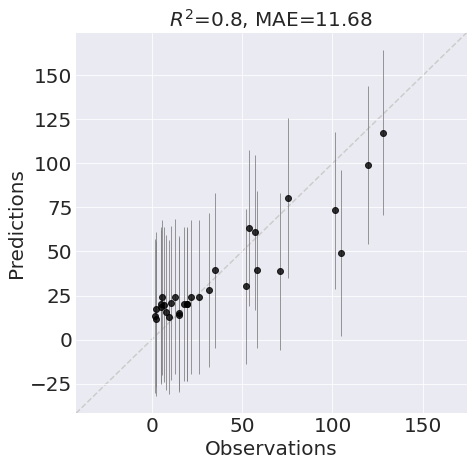

Starting parallel tempering using 10 chains…
/opt/conda/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/conda/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/conda/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/opt/conda/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available.

,ATOB_ECOLI,ERG8_YEAST,IDI_ECOLI,KIME_YEAST,MVD1_YEAST,Q40322_MENSP,Q8LKJ3_ABIGR,Q9FD86_STAAU,Q9FD87_STAAU,4-isopropenyl-1-methyl-cyclohexene
0,0.210217,0.272799,2.452609,1.289697,2.210495,14.213138,4.745971,0.430550,0.538967,139.068492
1,0.205987,0.532361,2.491983,1.006646,2.364980,14.207172,4.690484,0.442690,0.553247,138.274695
2,0.230716,0.417360,2.242739,1.131530,2.040693,14.207742,4.657792,0.486688,0.566877,138.120583
3,0.326298,0.254411,2.217767,0.887299,2.735803,14.201999,4.717434,0.428311,0.547930,138.114012
4,0.226253,0.437033,1.888650,1.151027,3.175302,14.212054,4.670406,0.441530,0.539484,138.073700
5,0.305540,0.298841,2.451907,1.431071,2.172404,14.205358,4.736053,0.435857,0.546515,137.984955
6,0.327419,0.227078,2.414493,1.274552,3.427841,14.205553,4.729883,0.421378,0.556054,137.869338
7,0.252236,0.480912,2.295630,1.255632,2.704038,14.215334,4.572314,0.453961,0.552029,137.800134
8,0.240558,0.308805,2.427835,1.255468,2.880250,14.166185,4.734418,0.489377,0.562899,137.739342
9,0.245839,0.370838,2.286502,1.285164,2.698785,14.212150,4.543096,0.460485,0.546955,137.618552


Sampling posterior predictive distributions…


/opt/conda/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Done sampling in 16.31 s
Calculating success probabilities…
Sampling posterior predictive distributions…


/opt/conda/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Done sampling in 13.72 s
Done calculating success probabilities in 13.72 s


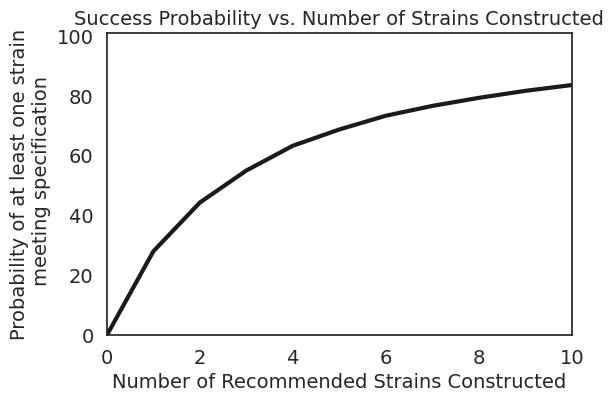

CPU times: user 8min 20s, sys: 1min 52s, total: 10min 12s
Wall time: 40min 35s


In [7]:
%%time
art = RecommendationEngine(df, **art_params)


In [8]:
art.save_pkl_object()